<a href="https://colab.research.google.com/github/Sathvik-P/LearningKeras/blob/main/LearningKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels = []
train_samples = []

In [ ]:
# going to make up some random data, just for training purposes
for i in range(50):
  # the 5% of younger patients w/ side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

# the 5% of older patients w/ no side effects
  random_older = randint(64,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  # the 95% of younger patients w/ no side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  # the 95% of older patients w/ side effects
  random_older = randint(64,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [ ]:
for i in train_samples:
  print(i)

# Time to Process the Data

In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
#shuffle it to mix up the order
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
#scale the ages to be between 0 and 1 instead of 13 and 100 to make it more efficent
scaler = MinMaxScaler(feature_range=(0,1))
#the data has to be 2D for the fit function, so we have to reshape it
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
for i in scaled_train_samples:
  print(i)

# Building the Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
#simplest model
model = Sequential([
    Dense(units=16, input_shape=(1,),activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#shuffle is set to true by default, just specifying it for learning 
# however, the validation set is split before the shuffle, that is why we shuffled it up above before this
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=15, shuffle=True, verbose=2)

# Predicting Using the Neural Network

In [ ]:
test_labels = []
test_samples = []

In [ ]:
# going to make up some random data, just for testing purposes
for i in range(50):
  # the 5% of younger patients w/ side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

# the 5% of older patients w/ no side effects
  random_older = randint(64,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(1000):
  # the 95% of younger patients w/ no side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  # the 95% of older patients w/ side effects
  random_older = randint(64,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [ ]:
#converting it to an np array so it can be passed as a param to the fit function
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
#shuffle it to mix up the order
test_labels, test_samples = shuffle(test_labels, test_samples)

In [ ]:
#scale the ages to be between 0 and 1 instead of 13 and 100 to make it more efficent
scaler = MinMaxScaler(feature_range=(0,1))
#the data has to be 2D for the fit function, so we have to reshape it
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [ ]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [ ]:
for i in predictions:
  print(i)

In [ ]:
#basically makes it so we see the most likely prediction instead of % of them both
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
for i in rounded_predictions:
  print(i)

# Confusion Matrix
Using a confusion matrix to see how accurate our model was in predicting the validation dataset

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix, without Normalization")
  
  print(cm)

  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')


Confusion Matrix, without Normalization
[[1013   37]
 [ 351  699]]


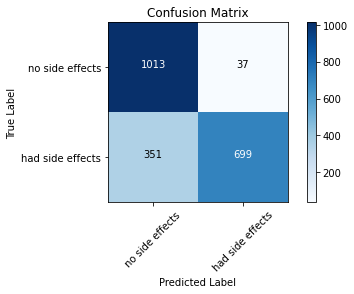

In [ ]:
cm_plot_labels = ['no side effects', 'had side effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Save and Load A Model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import os.path
if os.path.isfile('models/medical_trial_models.h5') is False:
  model.save('models/medical_trial_models.h5')

This save function saves:
  *   The architecture of the model, allowing us to recreate the model
  *   The weights of the model
  *   The training configuration (loss, optimizer)
  *   The state of the optimizer, allowing to resume training where you left off







In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_models.h5')

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.get_weights()

In [ ]:
new_model.optimizer

# Another Option for Saving a Model



*   Saving it as a json allows you to only save the architecture




In [ ]:
#save it as a JSON
json_string = model.to_json()

#save as YAML
#yaml_stirng = model.to_yaml()

In [ ]:
json_string

In [ ]:
#if we want to create a new model from our saved architecture
from tensorflow.keras.models import model_from_json
model_architecure = model_from_json(json_string)

#from tensorflow.keras.models import models_from_yaml
#model_architecure = model_from_yaml(yaml_string)

In [ ]:
model_architecure.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Saving Only Weights From a Model

In [ ]:
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
  model.save('models/my_model_weights.h5')

Since we only saved the weights, to use this we would need to create another model with the same architecture and then bring in the weights

In [ ]:
# ^ that is what we are doing in this cell
model2 = Sequential([
    Dense(units=16, input_shape=(1,),activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model2.load_weights('models/my_model_weights.h5')

In [ ]:
#this populates the new model with the saved weights from the old model
model2.get_weights()